In [1]:
%%html
<style>@import url('style.css')</style><script>IPython.OutputArea.prototype._should_scroll = function(){return false}</script>

In [2]:
%run -i '_DataFrame-CSS.ipynb'
IPython.display.HTML(_df_style)

In [3]:
%env THEANO_FLAGS=floatX=float32,device=gpu0

env: THEANO_FLAGS=floatX=float32,device=gpu0


---
#### Collect results for probability voting scheme without retraining

In [4]:
def collect_urbansound():
    for fold in ((10, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)):
        VALIDATION_FOLD = fold[0]
        TESTING_FOLD = fold[1]

        with open('_Models/UrbanSound8K-' + NET_WINDOW_SIZE + '-majority-Fold_{}_model.pkl'.format(TESTING_FOLD), 'rb') as f: model = cPickle.load(f)
        dataset = Dataset(urban_features, fold_testing=TESTING_FOLD, fold_validation=VALIDATION_FOLD, shape=dataset_shape)
        conf_matrix, aggregated = evaluate_model(dataset, model, TESTING_FOLD, 'Results/UrbanSound8K-' + NET_WINDOW_SIZE + '-probability-Fold_{}.txt'.format(TESTING_FOLD))
        gc.collect()
        
def collect_esc10():
    for fold in ((5, 1), (1, 2), (2, 3), (3, 4), (4, 5)):
        VALIDATION_FOLD = fold[0]
        TESTING_FOLD = fold[1]

        with open('_Models/ESC-10-' + NET_WINDOW_SIZE + '-majority-Fold_{}_model.pkl'.format(TESTING_FOLD), 'rb') as f: model = cPickle.load(f)
        dataset = Dataset(esc10_features, fold_testing=TESTING_FOLD, fold_validation=VALIDATION_FOLD, shape=dataset_shape)
        conf_matrix, aggregated = evaluate_model(dataset, model, TESTING_FOLD, 'Results/ESC-10-' + NET_WINDOW_SIZE + '-probability-Fold_{}.txt'.format(TESTING_FOLD))
        gc.collect()        
        
def collect_esc50():
    for fold in ((5, 1), (1, 2), (2, 3), (3, 4), (4, 5)):
        VALIDATION_FOLD = fold[0]
        TESTING_FOLD = fold[1]

        with open('_Models/ESC-50-' + NET_WINDOW_SIZE + '-majority-Fold_{}_model.pkl'.format(TESTING_FOLD), 'rb') as f: model = cPickle.load(f)
        dataset = Dataset(esc50_features, fold_testing=TESTING_FOLD, fold_validation=VALIDATION_FOLD, shape=dataset_shape)
        conf_matrix, aggregated = evaluate_model(dataset, model, TESTING_FOLD, 'Results/ESC-50-' + NET_WINDOW_SIZE + '-probability-Fold_{}.txt'.format(TESTING_FOLD))
        gc.collect()   

In [59]:
IMPORT_PATH = '_Datasets/'
%run -i '_Datasets/ESC-50.ipynb'
%run -i '_Datasets/ESC-10.ipynb'
%run -i '_Datasets/UrbanSound8K.ipynb'

NET_WINDOW_SIZE = 'short'  # 'long' or 'short'
NET_MODE = 'probability'     # 'majority' or 'probability'
dataset_shape = (-1, 60, 41, 1)

IMPORT_PATH = '_Networks/'
%run -i '_Networks/Net-DoubleConv.ipynb'

collect_urbansound()
collect_esc10()
collect_esc50()

UrbanSound8K dataset loaded.


Testing on fold 1
Test accuracy: 72.3%
Testing on fold 2
Test accuracy: 70.0%
Testing on fold 3
Test accuracy: 62.2%
Testing on fold 4
Test accuracy: 73.6%
Testing on fold 5
Test accuracy: 76.0%
Testing on fold 6
Test accuracy: 71.2%
Testing on fold 7
Test accuracy: 70.4%
Testing on fold 8
Test accuracy: 70.2%
Testing on fold 9
Test accuracy: 72.0%
Testing on fold 10
Test accuracy: 75.9%
Testing on fold 1
Test accuracy: 77.5%
Testing on fold 2
Test accuracy: 80.0%
Testing on fold 3
Test accuracy: 77.5%
Testing on fold 4
Test accuracy: 86.2%
Testing on fold 5
Test accuracy: 71.2%
Testing on fold 1
Test accuracy: 62.2%
Testing on fold 2
Test accuracy: 60.7%
Testing on fold 3
Test accuracy: 63.7%
Testing on fold 4
Test accuracy: 71.5%
Testing on fold 5
Test accuracy: 64.5%


In [49]:
IMPORT_PATH = '_Datasets/'
%run -i '_Datasets/ESC-50-Long.ipynb'
%run -i '_Datasets/ESC-10-Long.ipynb'
%run -i '_Datasets/UrbanSound8K-Long.ipynb'

NET_WINDOW_SIZE = 'long'  # 'long' or 'short'
NET_MODE = 'probability'     # 'majority' or 'probability'
dataset_shape = (-1, 60, 101, 1)

IMPORT_PATH = '_Networks/'
%run -i '_Networks/Net-DoubleConv.ipynb'

collect_urbansound()
collect_esc10()
collect_esc50()

UrbanSound8K dataset loaded.


Testing on fold 1
Test accuracy: 74.9%
Testing on fold 2
Test accuracy: 73.5%
Testing on fold 3
Test accuracy: 62.9%
Testing on fold 4
Test accuracy: 74.7%
Testing on fold 5
Test accuracy: 76.8%
Testing on fold 6
Test accuracy: 73.3%
Testing on fold 7
Test accuracy: 70.5%
Testing on fold 8
Test accuracy: 72.9%
Testing on fold 9
Test accuracy: 76.5%
Testing on fold 10
Test accuracy: 74.9%
Testing on fold 1
Test accuracy: 75.0%
Testing on fold 2
Test accuracy: 87.5%
Testing on fold 3
Test accuracy: 75.0%
Testing on fold 4
Test accuracy: 83.7%
Testing on fold 5
Test accuracy: 80.0%
Testing on fold 1
Test accuracy: 64.7%
Testing on fold 2
Test accuracy: 57.0%
Testing on fold 3
Test accuracy: 61.5%
Testing on fold 4
Test accuracy: 68.2%
Testing on fold 5
Test accuracy: 62.7%


---

#### Summarize results

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sb

def accuracy(conf):
    return np.sum(np.diag(conf)) / float(np.sum(conf))

results = pd.DataFrame(columns=['dataset', 'fold', 'method', 'accuracy'])

results = results.append(pd.DataFrame({
            'dataset': 'ESC-10',
            'fold': [1, 2, 3, 4, 5],
            'method': 'Baseline',
            'accuracy': [0.575, 0.787, 0.775, 0.762, 0.737]
        }, index=range(5)), ignore_index=True)

results = results.append(pd.DataFrame({
            'dataset': 'ESC-50',
            'fold': [1, 2, 3, 4, 5],
            'method': 'Baseline',
            'accuracy': [0.412, 0.48, 0.437, 0.457, 0.43]
        }, index=range(5)), ignore_index=True)

results = results.append(pd.DataFrame({
            'dataset': 'UrbanSound8K',
            'fold': [1, 2, 3, 4, 5],
            'method': 'Baseline',
            'accuracy': [0.6238, 0.6623, 0.6874, 0.7096, 0.7528] # estimates based on quartiles
        }, index=range(5)), ignore_index=True)

results = results.append(pd.DataFrame({
            'dataset': 'UrbanSound8K',
            'fold': [1, 2, 3, 4, 5],
            'method': 'Unsupervised',
            'accuracy': [0.647, 0.7046, 0.7555, 0.7724, 0.804] # estimates based on quartiles
        }, index=range(5)), ignore_index=True)

for fold in range(1, 6):
    with open('Results/ESC-10-short-majority-Fold_{}.txt'.format(fold)) as f:
        results = results.append(pd.DataFrame({'dataset': 'ESC-10', 'fold': fold, 'method': 'CNN - short/majority', 'accuracy': accuracy(np.loadtxt(f))}, index=[0]), ignore_index=0)
    with open('Results/ESC-10-short-probability-Fold_{}.txt'.format(fold)) as f:
        results = results.append(pd.DataFrame({'dataset': 'ESC-10', 'fold': fold, 'method': 'CNN - short/probability', 'accuracy': accuracy(np.loadtxt(f))}, index=[0]), ignore_index=0)
    with open('Results/ESC-10-long-majority-Fold_{}.txt'.format(fold)) as f:
        results = results.append(pd.DataFrame({'dataset': 'ESC-10', 'fold': fold, 'method': 'CNN - long/majority', 'accuracy': accuracy(np.loadtxt(f))}, index=[0]), ignore_index=0)     
    with open('Results/ESC-10-long-probability-Fold_{}.txt'.format(fold)) as f:
        results = results.append(pd.DataFrame({'dataset': 'ESC-10', 'fold': fold, 'method': 'CNN - long/probability', 'accuracy': accuracy(np.loadtxt(f))}, index=[0]), ignore_index=0)

for fold in range(1, 6):
    with open('Results/ESC-50-short-majority-Fold_{}.txt'.format(fold)) as f:
        results = results.append(pd.DataFrame({'dataset': 'ESC-50', 'fold': fold, 'method': 'CNN - short/majority', 'accuracy': accuracy(np.loadtxt(f))}, index=[0]), ignore_index=0)        
    with open('Results/ESC-50-short-probability-Fold_{}.txt'.format(fold)) as f:
        results = results.append(pd.DataFrame({'dataset': 'ESC-50', 'fold': fold, 'method': 'CNN - short/probability', 'accuracy': accuracy(np.loadtxt(f))}, index=[0]), ignore_index=0)
    with open('Results/ESC-50-long-majority-Fold_{}.txt'.format(fold)) as f:
        results = results.append(pd.DataFrame({'dataset': 'ESC-50', 'fold': fold, 'method': 'CNN - long/majority', 'accuracy': accuracy(np.loadtxt(f))}, index=[0]), ignore_index=0)     
    with open('Results/ESC-50-long-probability-Fold_{}.txt'.format(fold)) as f:
        results = results.append(pd.DataFrame({'dataset': 'ESC-50', 'fold': fold, 'method': 'CNN - long/probability', 'accuracy': accuracy(np.loadtxt(f))}, index=[0]), ignore_index=0)        
        
for fold in range(1, 11):
    with open('Results/UrbanSound8K-short-majority-Fold_{}.txt'.format(fold)) as f:
        results = results.append(pd.DataFrame({'dataset': 'UrbanSound8K', 'fold': fold, 'method': 'CNN - short/majority', 'accuracy': accuracy(np.loadtxt(f))}, index=[0]), ignore_index=0)                
    with open('Results/UrbanSound8K-short-probability-Fold_{}.txt'.format(fold)) as f:
        results = results.append(pd.DataFrame({'dataset': 'UrbanSound8K', 'fold': fold, 'method': 'CNN - short/probability', 'accuracy': accuracy(np.loadtxt(f))}, index=[0]), ignore_index=0)                
    with open('Results/UrbanSound8K-long-majority-Fold_{}.txt'.format(fold)) as f:
        results = results.append(pd.DataFrame({'dataset': 'UrbanSound8K', 'fold': fold, 'method': 'CNN - long/majority', 'accuracy': accuracy(np.loadtxt(f))}, index=[0]), ignore_index=0)                
    with open('Results/UrbanSound8K-long-probability-Fold_{}.txt'.format(fold)) as f:
        results = results.append(pd.DataFrame({'dataset': 'UrbanSound8K', 'fold': fold, 'method': 'CNN - long/probability', 'accuracy': accuracy(np.loadtxt(f))}, index=[0]), ignore_index=0)                        
        
print results

    accuracy       dataset  fold                   method
0   0.575000        ESC-10     1                 Baseline
1   0.787000        ESC-10     2                 Baseline
2   0.775000        ESC-10     3                 Baseline
3   0.762000        ESC-10     4                 Baseline
4   0.737000        ESC-10     5                 Baseline
5   0.412000        ESC-50     1                 Baseline
6   0.480000        ESC-50     2                 Baseline
7   0.437000        ESC-50     3                 Baseline
8   0.457000        ESC-50     4                 Baseline
9   0.430000        ESC-50     5                 Baseline
10  0.623800  UrbanSound8K     1                 Baseline
11  0.662300  UrbanSound8K     2                 Baseline
12  0.687400  UrbanSound8K     3                 Baseline
13  0.709600  UrbanSound8K     4                 Baseline
14  0.752800  UrbanSound8K     5                 Baseline
15  0.647000  UrbanSound8K     1             Unsupervised
16  0.704600  

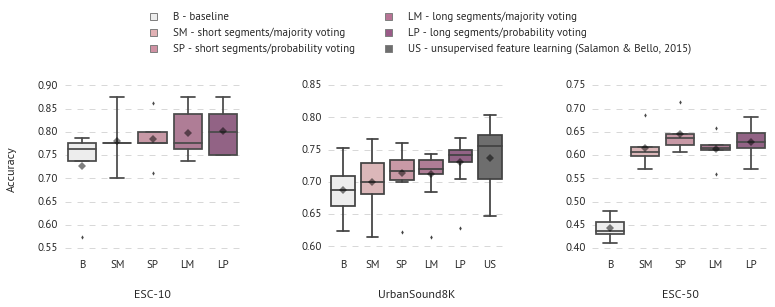

In [69]:
import matplotlib
sb.set(style="white")
matplotlib.rcParams['font.family'] = 'PT Sans'

palette = sb.cubehelix_palette(8)
palette[0] = [0.93, 0.93, 0.93]
palette[5] = [0.43, 0.43, 0.43]

def r(dataset, method):
    return results[(results['dataset'] == dataset) & (results['method'] == method)]['accuracy'].as_matrix()

f, axes = plt.subplots(1, 3, sharey=False, figsize=(42 / 3.33, 10 / 3.33))

meanstyle = {'marker': 'D', 'markeredgecolor': 'red', 'markerfacecolor': 'black', 'alpha': 0.5, 'markersize': 6}

sb.boxplot(data=[r('ESC-10', 'Baseline'),
            r('ESC-10', 'CNN - short/majority'),
            r('ESC-10', 'CNN - short/probability'),
            r('ESC-10', 'CNN - long/majority'),
            r('ESC-10', 'CNN - long/probability')],
           showmeans=True, meanprops=meanstyle, whis=1.5, ax=axes[0], palette=palette, fliersize=3)

sb.boxplot(data=[r('UrbanSound8K', 'Baseline'),
            r('UrbanSound8K', 'CNN - short/majority'),
            r('UrbanSound8K', 'CNN - short/probability'),
            r('UrbanSound8K', 'CNN - long/majority'),
            r('UrbanSound8K', 'CNN - long/probability'),
            r('UrbanSound8K', 'Unsupervised')],
           showmeans=True, meanprops=meanstyle, whis=1.5, ax=axes[1], palette=palette, fliersize=3)

sb.boxplot(data=[r('ESC-50', 'Baseline'),
            r('ESC-50', 'CNN - short/majority'),
            r('ESC-50', 'CNN - short/probability'),
            r('ESC-50', 'CNN - long/majority'),
            r('ESC-50', 'CNN - long/probability')],
           showmeans=True, meanprops=meanstyle, whis=1.5, ax=axes[2], palette=palette, fliersize=3)

axes[0].set_xticklabels(['B', 'SM', 'SP', 'LM', 'LP'])
axes[1].set_xticklabels(['B', 'SM', 'SP', 'LM', 'LP', 'US'])
axes[2].set_xticklabels(['B', 'SM', 'SP', 'LM', 'LP'])

axes[0].set_xlabel('ESC-10', fontsize=12, labelpad=20)
axes[1].set_xlabel('UrbanSound8K', fontsize=12, labelpad=20)
axes[2].set_xlabel('ESC-50', fontsize=12, labelpad=20)

axes[0].set_ylabel('Accuracy', fontsize=12, labelpad=20)

axes[0].set_yticks(np.arange(20) / 20.0)
axes[1].set_yticks(np.arange(20) / 20.0)
axes[2].set_yticks(np.arange(20) / 20.0)
axes[0].set_ylim(0.54, 0.9)
axes[1].set_ylim(0.59, 0.85)
axes[2].set_ylim(0.39, 0.75)
axes[0].tick_params(labelsize=11)
axes[1].tick_params(labelsize=11)
axes[2].tick_params(labelsize=11)

for y in range(0, 100, 5):
    axes[0].plot([-0.5, 5.5], [y / 100.0, y / 100.0], '--', lw=0.5, color="black", alpha=0.3, zorder=-10)
    axes[1].plot([-0.5, 6.5], [y / 100.0, y / 100.0], '--', lw=0.5, color="black", alpha=0.3, zorder=-10)
    axes[2].plot([-0.5, 5.5], [y / 100.0, y / 100.0], '--', lw=0.5, color="black", alpha=0.3, zorder=-10)
    
sb.despine(ax=axes[0], left=True, bottom=True, offset=50)
sb.despine(ax=axes[1], left=True, bottom=True, offset=50)
sb.despine(ax=axes[2], left=True, bottom=True, offset=50)

axes[1].legend( [plt.Line2D((0,1),(0,0), color=palette[0], marker='s', linestyle='', mec='gray', mew=1),
 plt.Line2D((0,1),(0,0), color=palette[1], marker='s', linestyle='', mec='gray', mew=1),
 plt.Line2D((0,1),(0,0), color=palette[2], marker='s', linestyle='', mec='gray', mew=1),
 plt.Line2D((0,1),(0,0), color=palette[3], marker='s', linestyle='', mec='gray', mew=1),
 plt.Line2D((0,1),(0,0), color=palette[4], marker='s', linestyle='', mec='gray', mew=1),
 plt.Line2D((0,1),(0,0), color=palette[5], marker='s', linestyle='', mec='gray', mew=1)],
            ['B - baseline',
             'SM - short segments/majority voting',
             'SP - short segments/probability voting',
             'LM - long segments/majority voting',
             'LP - long segments/probability voting',
             'US - unsupervised feature learning (Salamon & Bello, 2015)',
            ],
            loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2, fontsize=11)

f.subplots_adjust(wspace=0.5)

plt.savefig('Figures/Results.pdf', bbox_inches='tight')

In [53]:
conf = np.zeros((10, 10))
for fold in range(1, 11):
    with open('Results/UrbanSound8K-long-probability-Fold_{}.txt'.format(fold)) as f:
        conf = conf + np.loadtxt(f)
print conf


[[ 557.   10.   49.   30.  105.  115.    3.   57.   14.   60.]
 [   9.  338.   19.    6.   21.    5.    4.    5.    3.   19.]
 [  25.    5.  820.   43.   18.    8.    0.    2.   11.   68.]
 [  23.   18.   58.  840.   17.    6.   10.    3.   10.   15.]
 [  40.   18.   17.   27.  663.   50.    8.  128.   19.   30.]
 [ 107.    6.   17.    8.   35.  679.    1.  119.   11.   17.]
 [   1.    0.    0.   10.   10.    2.  346.    5.    0.    0.]
 [  98.    1.    5.    0.  145.   84.   11.  627.   21.    8.]
 [  17.    2.   53.   36.   23.    5.    1.    3.  753.   36.]
 [  34.    5.  154.    8.   11.    5.    0.   10.   13.  760.]]


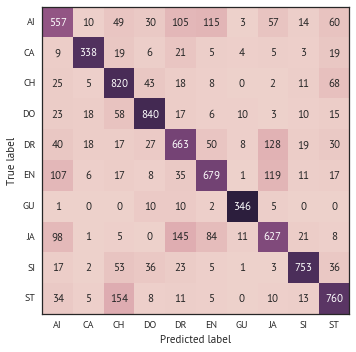

In [54]:
plt.imshow(conf / conf.sum(axis=1)[:, np.newaxis], interpolation='nearest', cmap=sb.cubehelix_palette(8, as_cmap=True))
plt.xticks(range(0, 10), ['AI', 'CA', 'CH', 'DO', 'DR', 'EN', 'GU', 'JA', 'SI', 'ST'])
plt.yticks(range(0, 10), ['AI', 'CA', 'CH', 'DO', 'DR', 'EN', 'GU', 'JA', 'SI', 'ST'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

for x in range(10):
    for y in range(10):
        if x == y:
            plt.text(x, y + 0.1, int(conf[y, x]), fontsize=11, ha='center', color='white')
        else:
            plt.text(x, y + 0.1, int(conf[y, x]), fontsize=11, ha='center')
            
plt.savefig('Figures/Conf.pdf', bbox_inches='tight')            

In [57]:
import cPickle

with open('_Models/ESC-10-long-majority-Fold_5_model.pkl', 'rb') as f:
    model = cPickle.load(f)

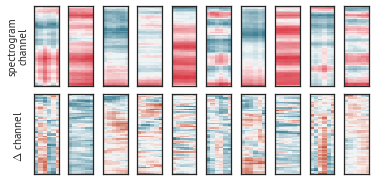

In [58]:
f = plt.figure(figsize=(6, 3))

cmap = sb.diverging_palette(220, 10, as_cmap=True)
cmap_delta = sb.diverging_palette(220, 19, as_cmap=True)

filters = [2, 3, 20, 21, 22, 23, 32, 33, 44, 70]    
    
for i in range(10):
    ax = plt.subplot2grid((2, 10), (0, i))
    ax.imshow(model.layers[0].get_weights_topo()[filters[i], :, :, 0], origin='lower', aspect='auto', cmap=cmap, interpolation='nearest')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot2grid((2, 10), (1, i))
    ax.imshow(model.layers[0].get_weights_topo()[filters[i], :, :, 1], origin='lower', aspect='auto', cmap=cmap_delta, interpolation='nearest')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

f.subplots_adjust(wspace=0.4, hspace=0.1)

plt.text(-80, 98, 'spectrogram\nchannel', fontsize=11, rotation=90, ha='center')
plt.text(-80, 38, '$\Delta$ channel', fontsize=11, rotation=90, ha='center')
plt.savefig('Figures/Filters.pdf', bbox_inches='tight')